In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
readIn = pd.read_csv("data/training_data.csv")
df = pd.DataFrame(readIn)


In [4]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [5]:
# print(df.shape)

# index_to_keep = df['BORROWER_ID'].isin(df_target['BORROWER_ID'])

# df = df[index_to_keep]

# print(df.shape)

In [6]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [7]:
data_count=len(df)

In [8]:
data_count

1602753

In [9]:
coloumns=[
    'CONTRACT_ID',
    'BORROWER_ID',
    'CONTRACT_BANK_ID',
    'CONTRACT_CREDIT_INTERMEDIARY',
    'CONTRACT_CREDIT_LOSS',
    'CONTRACT_CURRENCY',
    'CONTRACT_DATE_OF_LOAN_AGREEMENT',
    'CONTRACT_DEPT_SERVICE_TO_INCOME',
    'CONTRACT_FREQUENCY_TYPE',
    'CONTRACT_INCOME',
    'CONTRACT_INSTALMENT_AMOUNT',
    'CONTRACT_INSTALMENT_AMOUNT_2',
    'CONTRACT_INTEREST_PERIOD',
    'CONTRACT_INTEREST_RATE',
    'CONTRACT_LGD',
    'CONTRACT_LOAN_AMOUNT',
    'CONTRACT_LOAN_CONTRACT_TYPE',
    'CONTRACT_LOAN_TO_VALUE_RATIO',
    'CONTRACT_LOAN_TYPE',
    'CONTRACT_MARKET_VALUE',
    'CONTRACT_MATURITY_DATE',
    'CONTRACT_MORTGAGE_LENDING_VALUE',
    'CONTRACT_MORTGAGE_TYPE',
    'CONTRACT_REFINANCED',
    'CONTRACT_RISK_WEIGHTED_ASSETS',
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
    'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT',
    'TARGET_EVENT',
    'TARGET_EVENT_DAY'
]

# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MATURITY_DATE',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'TARGET_EVENT'
# ]

In [10]:
df=df[coloumns]

# Data cleaning

In [11]:
bemeno= []

## Coloumns

### CONTRACT_ID

### BORROWER_ID

In [12]:
df['BORROWER_ID'].value_counts()

BORROWER_ID
xNullx      1090
akvNVipI      24
qW3B+pgb      22
95IQewTL      19
JARtY3P1      18
            ... 
LqRn3EsW       1
odaCvCmO       1
seFkKZ2U       1
WJWtceMu       1
Dxng1cGs       1
Name: count, Length: 1149851, dtype: int64

In [13]:
# cols= [
#     'BORROWER_ID',
#     'BORROWER_BIRTH_YEAR',
#     'BORROWER_CITIZENSHIP',
#     'BORROWER_COUNTRY',
#     'BORROWER_COUNTY',
#     'BORROWER_TYPE_OF_CUSTOMER',
# ]

# df_borrower=df[cols]

# print(df_borrower.isna().sum())

In [14]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_BIRTH_YEAR

In [15]:
print(df['BORROWER_BIRTH_YEAR'].min ())
print(df['BORROWER_BIRTH_YEAR'].max())
df['BORROWER_BIRTH_YEAR'] = df.groupby('BORROWER_ID')['BORROWER_BIRTH_YEAR'].transform('max')
df.head(10)

1187.0
1287.0


,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1241.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,1246.0,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [16]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_CITIZENSHIP

In [17]:
df['BORROWER_CITIZENSHIP'] = df.groupby('BORROWER_ID')['BORROWER_CITIZENSHIP'].transform('max')
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_COUNTRY

In [18]:
df= df[df['BORROWER_COUNTRY']==98.0]

### BORROWER_COUNTY

In [19]:
df['BORROWER_COUNTY']=df['BORROWER_COUNTY'].fillna(0)

### BORROWER_TYPE_OF_CUSTOMER

### BORROWER_TYPE_OF_SETTLEMENT

In [20]:
df['BORROWER_TYPE_OF_SETTLEMENT']=df['BORROWER_TYPE_OF_SETTLEMENT'].fillna(0)

### CONTRACT_BANK_ID

In [21]:
len(df)

1559221

### CONTRACT_CREDIT_INTERMEDIARY

In [22]:
df['CONTRACT_CREDIT_INTERMEDIARY'].value_counts()

CONTRACT_CREDIT_INTERMEDIARY
2.0        1061767
1.0         452608
20001.0      18641
0.0            561
Name: count, dtype: int64

In [23]:
df['CONTRACT_CREDIT_INTERMEDIARY']=df['CONTRACT_CREDIT_INTERMEDIARY'].fillna(0)

### CONTRACT_CREDIT_LOSS

????? ez full zavaros

<Axes: >

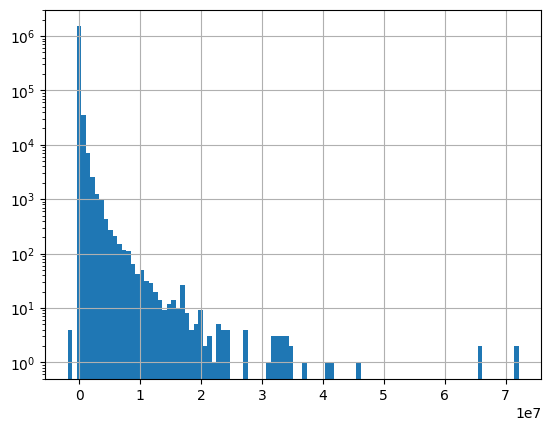

In [24]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)

In [25]:
df['CONTRACT_CREDIT_LOSS']=df['CONTRACT_CREDIT_LOSS'].fillna(0)

In [26]:
df['CONTRACT_CREDIT_LOSS'].isna().sum()

0

In [27]:
df.shape
df = df[~((df['TARGET_EVENT'] == 'K') & (df['CONTRACT_CREDIT_LOSS'] == 0))]

In [28]:
df2=df[df['CONTRACT_CREDIT_LOSS'] == 0]

df2['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    368259
E     14550
Name: count, dtype: int64

In [29]:
df3=df[df['CONTRACT_CREDIT_LOSS'] > df['CONTRACT_CREDIT_LOSS'].max()*0.1]

df3['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    359
E    157
K     66
Name: count, dtype: int64

### CONTRACT_CURRENCY

In [30]:
df=df[df['CONTRACT_CURRENCY']==31]

### CONTRACT_DATE_OF_LOAN_AGREEMENT

In [31]:
len(df)

1559083

### CONTRACT_DEPT_SERVICE_TO_INCOME

<Axes: >

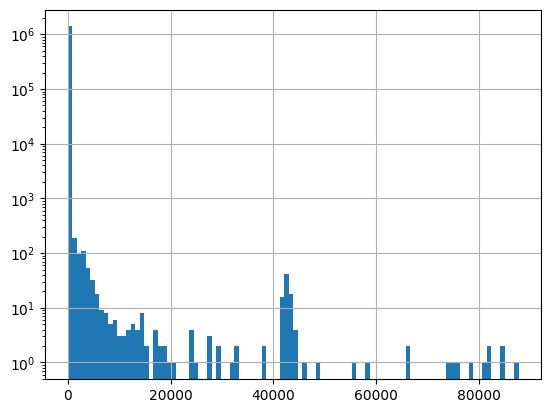

In [32]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].hist(bins=100, log=True)

In [33]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME']=df['CONTRACT_DEPT_SERVICE_TO_INCOME'].fillna(0)

In [34]:
len(df)

1559083

### CONTRACT_FREQUENCY_TYPE

In [35]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1452533
87db11f5      45553
2f88e16c      42630
3265c5b7      16411
ad534644       1582
89efd382        315
2aebe4cb         52
bd092d5a          7
Name: count, dtype: int64

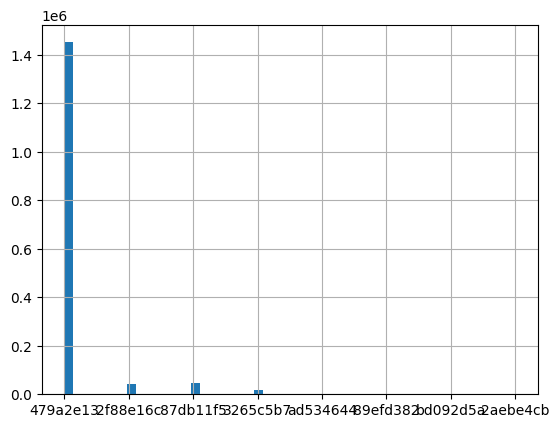

In [36]:
df['CONTRACT_FREQUENCY_TYPE'].hist(bins=50)
plt.show()

### CONTRACT_INCOME

In [37]:
df['CONTRACT_INCOME']=df['CONTRACT_INCOME'].fillna(0)

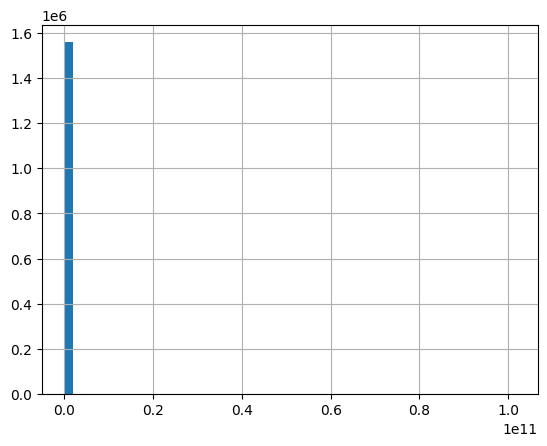

In [38]:
df['CONTRACT_INCOME'].hist(bins=50)
plt.show()

In [39]:
cols=['CONTRACT_DEPT_SERVICE_TO_INCOME','CONTRACT_INCOME', 'CONTRACT_LOAN_AMOUNT' ]

df[cols].head(20)

,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_LOAN_AMOUNT
0,0.00,0.0,192161
2,7.05,127305.0,275924
3,0.00,0.0,138862
4,0.00,0.0,169624
5,0.00,0.0,100079
7,0.00,0.0,140975
8,0.00,0.0,60963
9,0.00,0.0,190782
10,0.00,0.0,130827
11,10.74,109235.0,307046


### CONTRACT_INSTALMENT_AMOUNT and _2

In [40]:
df2 = df[((df['CONTRACT_INSTALMENT_AMOUNT'] >0) & (df['CONTRACT_INSTALMENT_AMOUNT_2'].isna()))]
df2

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
1617,5Uy+jWZW,Sp1hxp53,2c6f5579,0.0,47066.0,31,2457169,0.00,479a2e13,0.0,...,61.20,NaN,1239.0,98.0,98.0,171.0,A,0.0,-,NaN
12669,5uo5128j,aAH+yG04,2c6f5579,0.0,0.0,31,2457101,45.32,479a2e13,167772.0,...,128.52,NaN,1256.0,98.0,98.0,22.0,A,0.0,-,NaN
12803,DHIYXXCu,09B/yxFY,2c6f5579,0.0,0.0,31,2457038,5.49,479a2e13,235557.0,...,NaN,NaN,1220.0,98.0,98.0,81.0,A,0.0,-,NaN
13690,uQ9XTlvf,ZRFor64M,2c6f5579,0.0,0.0,31,2457177,25.30,479a2e13,113546.0,...,0.00,NaN,1221.0,98.0,98.0,19.0,A,0.0,E,2457261.0
24539,xmixz0e4,ZstDPhpc,1d42bbf5,0.0,0.0,31,2457102,0.00,479a2e13,0.0,...,NaN,NaN,1222.0,98.0,98.0,0.0,A,0.0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601704,Hdsnc2WQ,0drF/OBO,03c6e53a,0.0,0.0,31,2457084,0.00,479a2e13,0.0,...,NaN,NaN,1222.0,98.0,98.0,0.0,B,0.0,-,NaN
1601705,Hdsnc2WQ,5cABS6K9,03c6e53a,0.0,0.0,31,2457084,0.00,479a2e13,0.0,...,NaN,NaN,1222.0,98.0,98.0,0.0,A,0.0,-,NaN
1601890,Gc-LDM5M,m2DB5bXO,e9d8a221,0.0,0.0,31,2457099,0.00,479a2e13,0.0,...,NaN,NaN,1252.0,98.0,98.0,0.0,A,0.0,E,2457904.0
1602078,DELLxqy,pteqjIuq,03c6e53a,0.0,0.0,31,2457233,0.00,479a2e13,0.0,...,NaN,NaN,1250.0,98.0,98.0,0.0,A,0.0,-,NaN


In [41]:
df['CONTRACT_INSTALMENT_AMOUNT'] = df['CONTRACT_INSTALMENT_AMOUNT'].fillna(df['CONTRACT_INSTALMENT_AMOUNT_2'])


In [42]:
df = df.drop('CONTRACT_INSTALMENT_AMOUNT_2', axis=1)

In [43]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                 374
CONTRACT_INTEREST_PERIOD                328591
CONTRACT_INTEREST_RATE                    2106
CONTRACT_LGD                               630
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1133204
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1033387
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE        1023975
CONTRACT_MORT

### CONTRACT_INTEREST_PERIOD

In [44]:
len(df['CONTRACT_INTEREST_PERIOD'].unique())

1039

<Axes: >

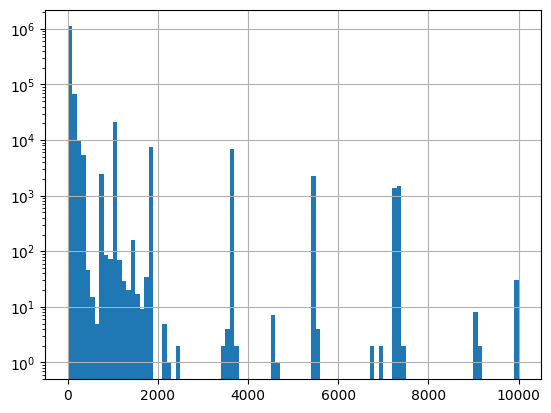

In [45]:
df['CONTRACT_INTEREST_PERIOD'].hist(bins=100, log=True)

In [46]:
df = df.drop('CONTRACT_INTEREST_PERIOD', axis=1)

### CONTRACT_INTEREST_RATE

In [47]:
df['CONTRACT_INTEREST_RATE']=df['CONTRACT_INTEREST_RATE'].fillna(0)

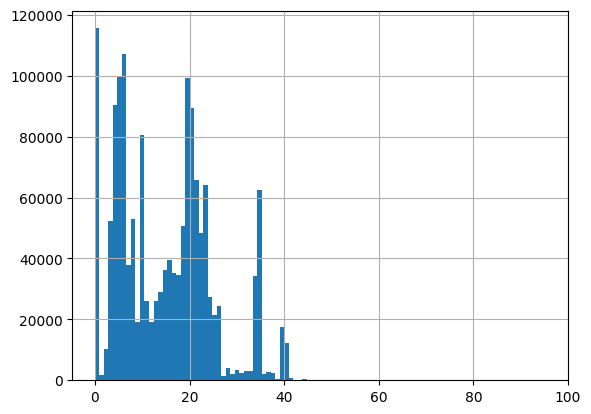

In [48]:
df['CONTRACT_INTEREST_RATE'].hist(bins=100)
plt.show()

### CONTRACT_LGD

<Axes: >

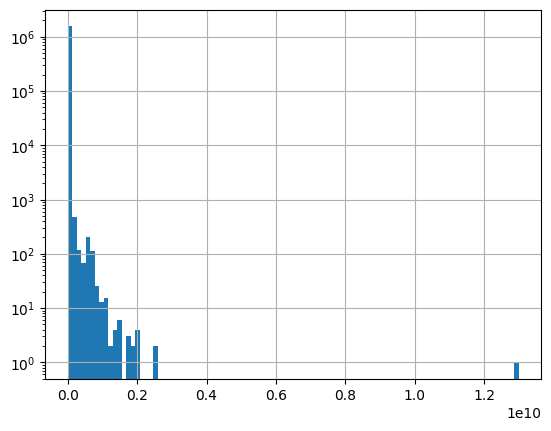

In [49]:
df['CONTRACT_LGD'].hist(bins=100, log=True)

In [50]:
df=df[df['CONTRACT_LGD'].max()*0.5>df['CONTRACT_LGD']]

In [51]:
len(df)

1558452

In [52]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                   0
CONTRACT_INTEREST_RATE                       0
CONTRACT_LGD                                 0
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1132574
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1032934
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE        1023532
CONTRACT_MORTGAGE_TYPE                 1023532
CONTRACT_REFI

### CONTRACT_LOAN_AMOUNT

### CONTRACT_LOAN_CONTRACT_TYPE

In [53]:
df['CONTRACT_LOAN_CONTRACT_TYPE'].value_counts()

CONTRACT_LOAN_CONTRACT_TYPE
1     609420
2     366979
12    357927
3      76779
11     55562
9      49131
6      32901
4       9753
Name: count, dtype: int64

### CONTRACT_LOAN_TO_VALUE_RATIO

<Axes: >

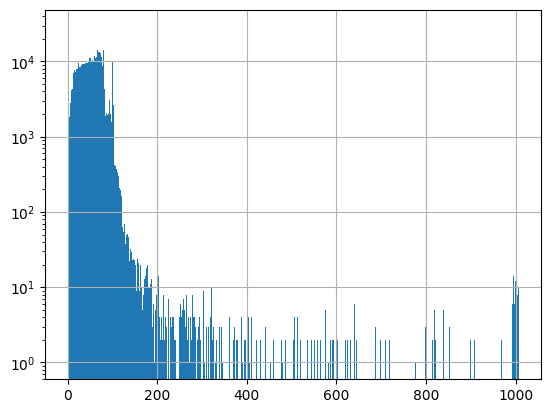

In [54]:
df['CONTRACT_LOAN_TO_VALUE_RATIO'].hist(bins=500, log=True)

In [55]:
len(df)

#df=df[df['CONTRACT_LOAN_TO_VALUE_RATIO'].max()*0.9>df['CONTRACT_LOAN_TO_VALUE_RATIO']]

1558452

In [56]:
len(df)

1558452

In [57]:
df['CONTRACT_LOAN_TO_VALUE_RATIO']=df['CONTRACT_LOAN_TO_VALUE_RATIO'].fillna(0)

### CONTRACT_LOAN_TYPE

In [58]:
df['CONTRACT_LOAN_TYPE'].value_counts()

CONTRACT_LOAN_TYPE
b503a0de    989184
1f951336    157564
d3aaffde     87952
7e2065f4     86774
69f70539     65226
955ae3ef     56463
2f88e16c     42616
cf07c2dd     35532
5a06241e     20900
83910425      6794
694cbaee      3447
0aeb4094      2742
eab72d7a      2300
95c4f8fb       571
f792971b       229
cde77491       102
47693941        53
8fe006f1         3
Name: count, dtype: int64

### CONTRACT_MARKET_VALUE

In [59]:
len(df)

1558452

<Axes: >

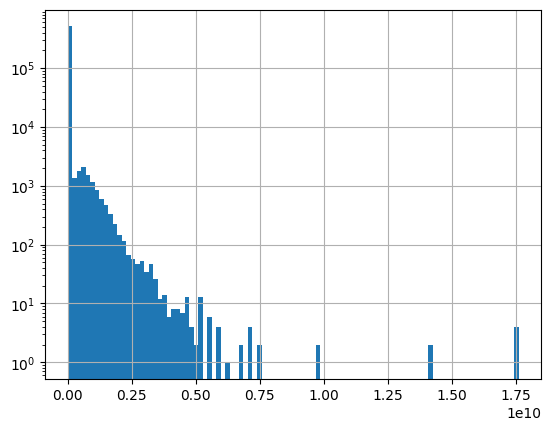

In [60]:
df['CONTRACT_MARKET_VALUE'].hist(bins=100, log=True)

In [61]:
#df=df[df['CONTRACT_MARKET_VALUE'].max()*0.9>df['CONTRACT_MARKET_VALUE']]

In [62]:
len(df)

1558452

In [63]:
df['CONTRACT_MARKET_VALUE']=df['CONTRACT_MARKET_VALUE'].fillna(0)

In [64]:
len(df)

1558452

### CONTRACT_MATURITY_DATE

### CONTRACT_MORTGAGE_LENDING_VALUE

In [65]:
df['CONTRACT_MORTGAGE_LENDING_VALUE']=df['CONTRACT_MORTGAGE_LENDING_VALUE'].fillna(0)

In [66]:
df=df[df['CONTRACT_MORTGAGE_LENDING_VALUE'].max()*0.9>df['CONTRACT_MORTGAGE_LENDING_VALUE']]

<Axes: >

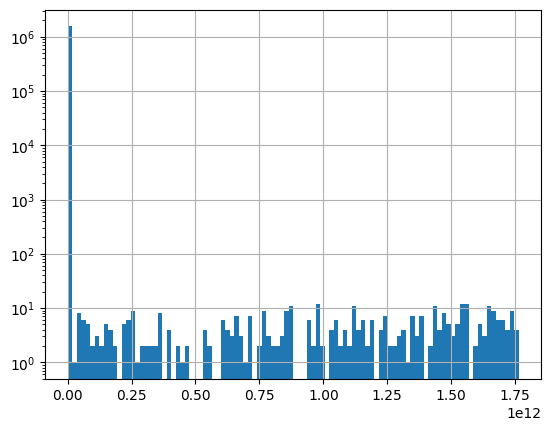

In [67]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].hist(bins=100, log=True)

In [68]:
len(df)

1558450

### CONTRACT_MORTGAGE_TYPE

In [69]:
df['CONTRACT_MORTGAGE_TYPE']=df['CONTRACT_MORTGAGE_TYPE'].fillna(0)

### CONTRACT_REFINANCED

In [70]:
df['CONTRACT_REFINANCED']=df['CONTRACT_REFINANCED'].fillna(0)

### CONTRACT_RISK_WEIGHTED_ASSETS

<Axes: >

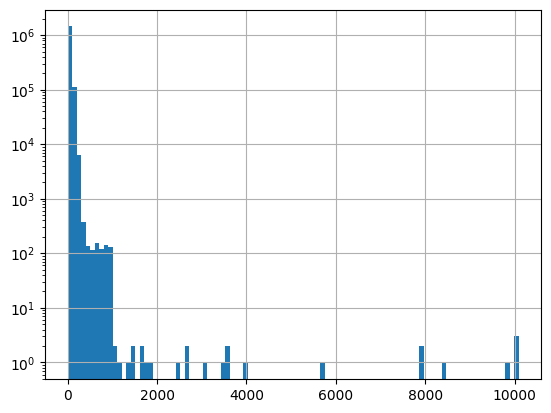

In [71]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].hist(bins=100, log=True)

In [72]:
df=df[df['CONTRACT_RISK_WEIGHTED_ASSETS'].max()*0.5>df['CONTRACT_RISK_WEIGHTED_ASSETS']]

### CONTRACT_TYPE_OF_INTEREST_REPAYMENT

In [73]:
df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT']=df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].fillna(0)

### TARGET_EVENT_DAY

### TARGET_EVENT

### Check ISNA

In [74]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,0.00,479a2e13,0.0,...,1.00,0.0,1241.0,98.0,98.0,20.0,A,0.0,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,0.0,0.0,31,2457038,0.00,479a2e13,0.0,...,0.99,0.0,1221.0,98.0,98.0,0.0,A,0.0,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,0.00,479a2e13,0.0,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,0.00,479a2e13,0.0,...,0.98,0.0,1204.0,98.0,98.0,0.0,A,0.0,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,0.00,479a2e13,0.0,...,1.03,0.0,1255.0,98.0,98.0,4.0,A,0.0,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,0.00,479a2e13,0.0,...,1.04,0.0,1234.0,98.0,98.0,0.0,A,0.0,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,0.00,479a2e13,0.0,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,0.0,-,NaN
10,siZsAv94,O7soZ57f,1d42bbf5,2.0,0.0,31,2457084,0.00,479a2e13,0.0,...,1.01,0.0,1211.0,98.0,98.0,120.0,A,0.0,-,NaN
11,Cau-hmu+,CnYRm/vc,1d42bbf5,2.0,1580.0,31,2457100,10.74,479a2e13,109235.0,...,1.01,100001.0,1238.0,98.0,98.0,29.0,A,0.0,-,NaN


In [75]:
duplikalt_sorok = df[df.duplicated(subset=['CONTRACT_ID','BORROWER_ID','CONTRACT_BANK_ID'])]

In [76]:
len(df)

1558442

In [77]:
col=['CONTRACT_CREDIT_LOSS', 'TARGET_EVENT']
df2=df[col]
df2.head(100)

,CONTRACT_CREDIT_LOSS,TARGET_EVENT
0,0.0,-
2,16350.0,-
3,0.0,-
4,2395.0,-
5,0.0,-
...,...,...
115,15866.0,-
116,15866.0,-
117,0.0,-
118,30338.0,-


First, i should prepare the borrower data, and maybe with that, i could predict certain elements  of the contract data.

In [78]:
df.isna().sum()

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                   0
CONTRACT_INTEREST_RATE                       0
CONTRACT_LGD                                 0
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO                 0
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                        0
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE              0
CONTRACT_MORTGAGE_TYPE                       0
CONTRACT_REFI

In [79]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1452061
87db11f5      45473
2f88e16c      42616
3265c5b7      16338
ad534644       1580
89efd382        315
2aebe4cb         52
bd092d5a          7
Name: count, dtype: int64

#### CONTRACT_CREDIT_LOSS

In [80]:
df['CONTRACT_CREDIT_LOSS'].isna().sum()

0

In [81]:
df.nunique()

CONTRACT_ID                            1235355
BORROWER_ID                            1135558
CONTRACT_BANK_ID                           132
CONTRACT_CREDIT_INTERMEDIARY                 4
CONTRACT_CREDIT_LOSS                    164839
CONTRACT_CURRENCY                            1
CONTRACT_DATE_OF_LOAN_AGREEMENT           1070
CONTRACT_DEPT_SERVICE_TO_INCOME          11345
CONTRACT_FREQUENCY_TYPE                      8
CONTRACT_INCOME                         409976
CONTRACT_INSTALMENT_AMOUNT              151977
CONTRACT_INTEREST_RATE                    4319
CONTRACT_LGD                            875019
CONTRACT_LOAN_AMOUNT                    819415
CONTRACT_LOAN_CONTRACT_TYPE                  8
CONTRACT_LOAN_TO_VALUE_RATIO             11657
CONTRACT_LOAN_TYPE                          18
CONTRACT_MARKET_VALUE                   273354
CONTRACT_MATURITY_DATE                   10626
CONTRACT_MORTGAGE_LENDING_VALUE         270878
CONTRACT_MORTGAGE_TYPE                      18
CONTRACT_REFI

In [82]:
df=df.drop_duplicates()

print(df.shape)
df.to_csv('data/df.csv', index=False)

(1558442, 32)


In [83]:
len(df)

1558442